In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from sklearn.datasets import load_boston

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
sns.set_style('whitegrid')
plt.rc('figure', figsize=(16.0, 8.0))

In [5]:
boston = load_boston()

In [6]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

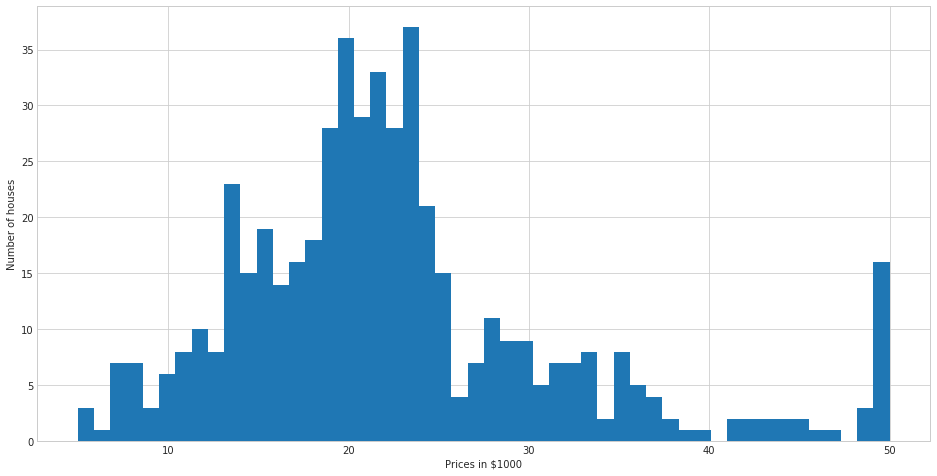

In [7]:
plt.hist(boston.target, bins=50)
plt.xlabel("Prices in $1000")
plt.ylabel("Number of houses")

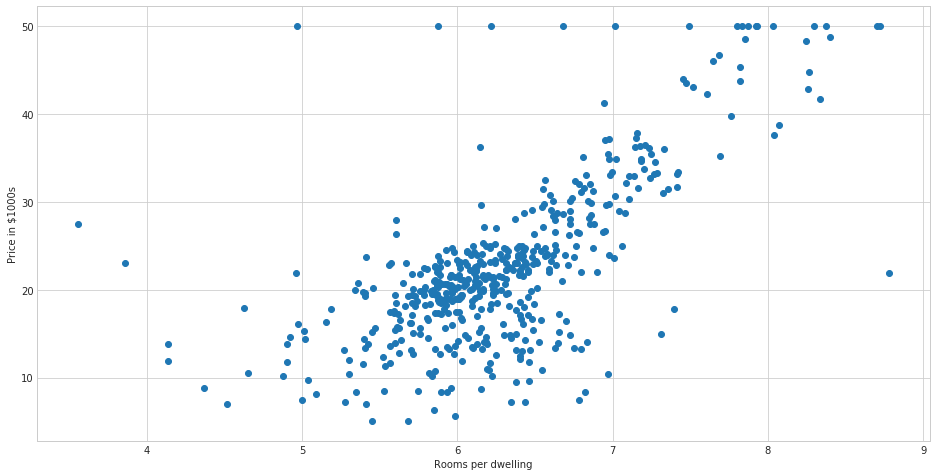

In [8]:
plt.scatter(boston.data[:,5], boston.target)
plt.xlabel('Rooms per dwelling')
plt.ylabel('Price in $1000s')

In [9]:
boston_df = DataFrame(boston.data)
boston_df.columns = boston.feature_names

In [10]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [11]:
boston_df['TRGT'] = boston.target

In [12]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TRGT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


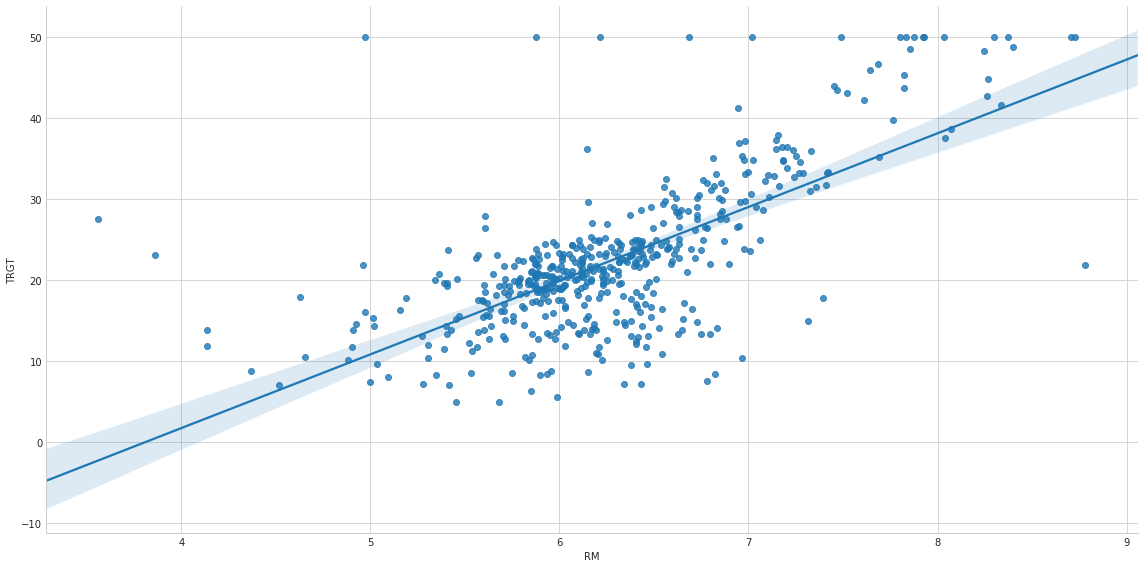

In [13]:
plt.figure(figsize=(16,8))
sns.lmplot('RM', 'TRGT', boston_df, size=8, aspect=2)

In [47]:
X = boston_df.RM
X.head(10)

0    6.575
1    6.421
2    7.185
3    6.998
4    7.147
5    6.430
6    6.012
7    6.172
8    5.631
9    6.004
Name: RM, dtype: float64

In [48]:
X = np.vstack(boston_df.RM)
X[:10]

array([[ 6.575],
       [ 6.421],
       [ 7.185],
       [ 6.998],
       [ 7.147],
       [ 6.43 ],
       [ 6.012],
       [ 6.172],
       [ 5.631],
       [ 6.004]])

In [49]:
Y = boston_df.TRGT
Y[:10]

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
5    28.7
6    22.9
7    27.1
8    16.5
9    18.9
Name: TRGT, dtype: float64

In [50]:
X = np.hstack((X, np.ones_like(X)))

In [51]:
X

array([[ 6.575,  1.   ],
       [ 6.421,  1.   ],
       [ 7.185,  1.   ],
       ..., 
       [ 6.976,  1.   ],
       [ 6.794,  1.   ],
       [ 6.03 ,  1.   ]])

In [52]:
m, b = np.linalg.lstsq(X, Y)[0]

In [53]:
print(m, b)

9.10210898118 -34.6706207764


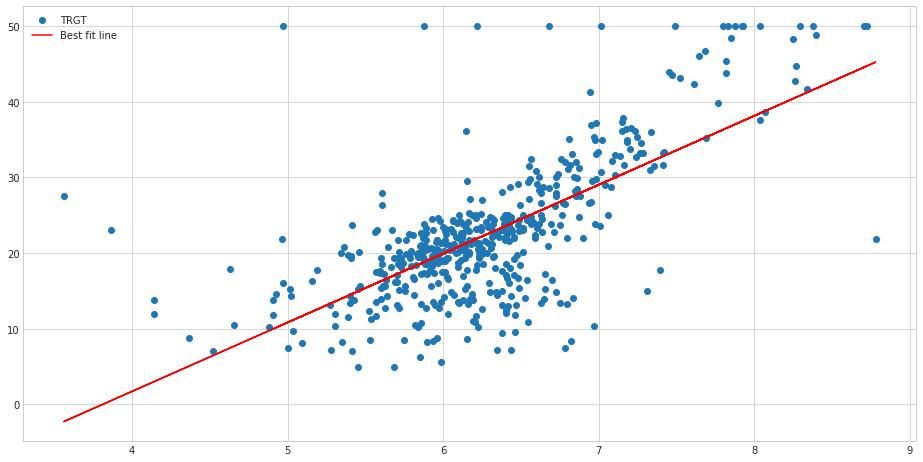

In [57]:
plt.plot(boston_df.RM, boston_df.TRGT, 'o')

x = boston_df.RM
plt.plot(x, m*x + b, 'r', label = "Best fit line")
plt.legend()

In [58]:
result = np.linalg.lstsq(X, Y)

error_total = result[1]
rmse = np.sqrt(error_total/len(X))

In [59]:
print('RMSE %.2f' % (rmse))

RMSE 6.60


In [60]:
np.std(X)

2.6885289211872183

In [61]:
np.std(Y)

9.188011545278206

In [62]:
from sklearn.linear_model import LinearRegression

In [63]:
lreg = LinearRegression()

In [64]:
X_multi = boston_df.drop('TRGT', axis=1)
Y_target = boston_df.TRGT

In [65]:
lreg.fit(X_multi, Y_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [67]:
print("The estimated intercept coefficient is %.2f" % (lreg.intercept_))
print("The number of coefficients used was %d" % (len(lreg.coef_)))

The estimated intercept coefficient is 36.49
The number of coefficients used was 13


In [70]:
print("Coefficients: ", lreg.coef_)

Coefficients:  [ -1.07170557e-01   4.63952195e-02   2.08602395e-02   2.68856140e+00
  -1.77957587e+01   3.80475246e+00   7.51061703e-04  -1.47575880e+00
   3.05655038e-01  -1.23293463e-02  -9.53463555e-01   9.39251272e-03
  -5.25466633e-01]


In [71]:
-1.07170557e-01

-0.107170557

In [72]:
coeff_df = DataFrame(boston_df.columns)
coeff_df.columns = ['Features']
coeff_df

,Features
0,CRIM
1,ZN
2,INDUS
3,CHAS
4,NOX
5,RM
6,AGE
7,DIS
8,RAD
9,TAX


In [73]:
coeff_df['Coefficient Estimate'] = Series(lreg.coef_)
coeff_df

,Features,Coefficient Estimate
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


In [90]:
coeff_df['Correlation with TRGT'] = boston_df.corrwith(boston_df.TRGT).values
coeff_df

,Features,Coefficient Estimate,Correlation with TRGT
0,CRIM,-0.107171,-0.385832
1,ZN,0.046395,0.360445
2,INDUS,0.020860,-0.483725
3,CHAS,2.688561,0.175260
4,NOX,-17.795759,-0.427321
5,RM,3.804752,0.695360
6,AGE,0.000751,-0.376955
7,DIS,-1.475759,0.249929
8,RAD,0.305655,-0.381626
9,TAX,-0.012329,-0.468536


In [94]:
from sklearn import model_selection

In [108]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, boston_df.TRGT)

In [109]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(379, 2)
(127, 2)
(379,)
(127,)


In [110]:
X_test[:10]

array([[ 6.436,  1.   ],
       [ 5.093,  1.   ],
       [ 6.77 ,  1.   ],
       [ 6.398,  1.   ],
       [ 6.113,  1.   ],
       [ 6.101,  1.   ],
       [ 6.273,  1.   ],
       [ 6.23 ,  1.   ],
       [ 6.127,  1.   ],
       [ 6.538,  1.   ]])

In [111]:
lreg = LinearRegression()
lreg.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [112]:
pred_train = lreg.predict(X_train)
pred_test = lreg.predict(X_test)

In [113]:
print(np.mean((Y_train - pred_train)**2))
print(np.mean((Y_test - pred_test)**2))

39.511474955110316
57.78928533760362


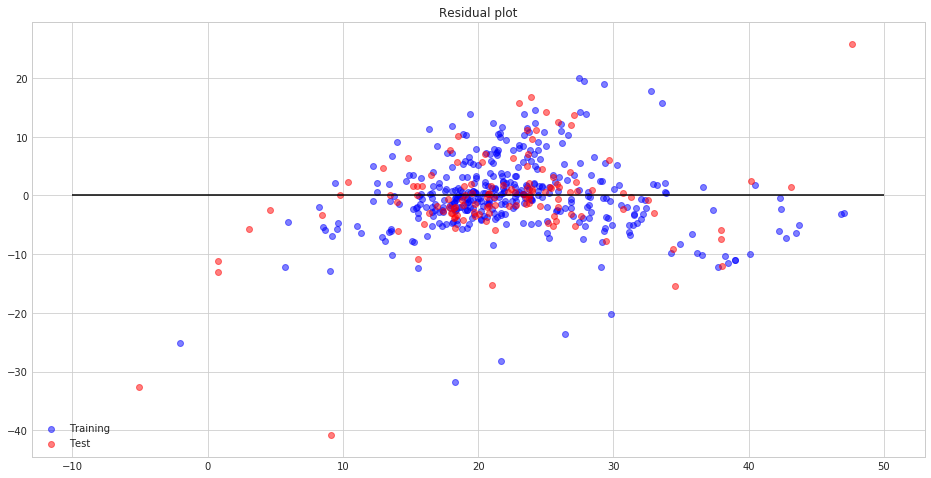

In [117]:
train = plt.scatter(pred_train, pred_train - Y_train, c='b', alpha=0.5)
test = plt.scatter(pred_test, pred_test - Y_test, c='r', alpha=0.5)

plt.hlines(y=0, xmin=-10, xmax=50)

plt.legend((train, test), ('Training', 'Test'), loc='lower left')
plt.title('Residual plot')